In [137]:
import pandas as pd
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
from datetime import datetime, timedelta
import dateutil.parser
import numpy as np
import seaborn as sns
%matplotlib inline

## Vienna

In [81]:
path = ".\\data\\"

In [82]:
files = [f for f in listdir(path)]

In [83]:
vienna_dfs = [pd.read_pickle(path + file) for file in tqdm(files) if file[:3] == "VIE"]

100%|█████████████████████████████████████████████████████████████████████████████| 5763/5763 [00:14<00:00, 399.31it/s]


In [84]:
df_vie = pd.concat(vienna_dfs, sort = False).sort_values(by = ["actual"]).drop_duplicates(keep = "last")
df_vie.reset_index(drop = True, inplace = True)

,fn,scheduledatetime,schedule,actualdatetime,actual,status,aircraft,airline,destinations
0,ET 726,2019-12-13T04:55:00Z,2019-12-13T05:55:00.000,2019-12-13T04:38:00Z,2019-12-13T05:38:00.000,BLI,Boeing 777-200LR,Ethiopian Airlines,Addis Ababa Bole International Airport
1,OS 872,2019-12-13T05:00:00Z,2019-12-13T06:00:00.000,2019-12-13T04:41:00Z,2019-12-13T05:41:00.000,BLI,Airbus 320,Austrian,Imam Khomeini International Airport
2,OS 776,2019-12-13T05:05:00Z,2019-12-13T06:05:00.000,2019-12-13T04:44:00Z,2019-12-13T05:44:00.000,BLI,Airbus 319,Austrian,Skopje International Airport
3,OS 850,2019-12-13T05:05:00Z,2019-12-13T06:05:00.000,2019-12-13T04:52:00Z,2019-12-13T05:52:00.000,BLI,Airbus 320,Austrian,Tirana International Airport
4,OS 744,2019-12-13T05:00:00Z,2019-12-13T06:00:00.000,2019-12-13T04:57:00Z,2019-12-13T05:57:00.000,BLI,Embraer 195,Austrian,Kosice International Airport


In [85]:
df_vie["scheduledatetime"] = [dateutil.parser.parse(x) for x in df_vie["scheduledatetime"]]
df_vie["actualdatetime"] = [dateutil.parser.parse(x) for x in df_vie["actualdatetime"]]

In [151]:
df_vie["delay"] = df_vie["actualdatetime"] - df_vie["scheduledatetime"]
df_vie["delay"] = (df_vie["delay"] / np.timedelta64(1, 'm'))

In [154]:
sum(df_vie["delay"])/ len(df_vie["delay"])

13.186505507955937

## Budapest

In [163]:
budapest_dfs = [pd.read_pickle(path + file) for file in tqdm(files) if file[:3] == "BUD"]

100%|███████████████████████████████████████████████████████████████████████████| 5763/5763 [00:00<00:00, 68295.16it/s]


In [164]:
df_bud = pd.concat(budapest_dfs)
df_bud.reset_index(drop = True, inplace = True)
df_bud.head()

,airline,airline_fullname,airline_id,airline_website,airport_via_iata,airport_via_name,custom001,custom002,custom003,custom004,...,megjegyzes_eng,sst,suffix,szinezes,terminal,tervezett_datum,tervezett_ido,uniqueautoid,varhato_datum,varhato_ido
0,Wizz Air,Wizz Air,W6,http://www.wizzair.com,,,customerrelations.hu@wizzair.com,https://facebook.com/wizzaircom,https://twitter.com/wizzair,http://wizzair.com/useful_information/baggage/...,...,Departed,00,,0,1,20191212,01:30,M3027467,20191212,01:45
1,Wizz Air,Wizz Air,W6,http://www.wizzair.com,,,customerrelations.hu@wizzair.com,https://facebook.com/wizzaircom,https://twitter.com/wizzair,http://wizzair.com/useful_information/baggage/...,...,Departed,00,,0,2B,20191212,05:55,M3022779,20191212,06:04
2,Wizz Air,Wizz Air,W6,http://www.wizzair.com,,,customerrelations.hu@wizzair.com,https://facebook.com/wizzaircom,https://twitter.com/wizzair,http://wizzair.com/useful_information/baggage/...,...,Departed,00,,0,2B,20191212,06:00,M3022780,20191212,06:45
3,Wizz Air,Wizz Air,W6,http://www.wizzair.com,,,customerrelations.hu@wizzair.com,https://facebook.com/wizzaircom,https://twitter.com/wizzair,http://wizzair.com/useful_information/baggage/...,...,Departed,00,,0,2B,20191212,06:05,M3022782,20191212,07:45
4,Etihad Airways,Etihad Airways,EY,http://www.etihad.com/,,,,https://facebook.com/etihad.airways,https://twitter.com/EtihadAirways,http://www.etihad.com/en/before-you-fly/baggag...,...,Departed,SL,,0,2A,20191212,06:05,C1033823,20191212,06:11


In [165]:
df_bud["tervezett"] = df_bud["tervezett_datum"].map(str) + "-" + df_bud["tervezett_ido"]
df_bud["varhato"] = df_bud["varhato_datum"].map(str) + "-" + df_bud["varhato_ido"]

In [166]:
df_bud["tervezett"] = [datetime.strptime(x, "%Y%m%d-%H:%M") for x in df_bud["tervezett"]]
df_bud = df_bud[df_bud["varhato"] != "-"]
df_bud["varhato"] = [datetime.strptime(x, "%Y%m%d-%H:%M") for x in df_bud["varhato"]]

In [167]:
df_bud["delay"] = df_bud["varhato"] - df_bud["tervezett"]
df_bud["delay"] = (df_bud["delay"] / np.timedelta64(1, 'm'))
df_bud = df_bud[df_bud["delay"]>-100]

In [168]:
sum(df_bud["delay"]) / len(df_bud["delay"])

11.962290862290862

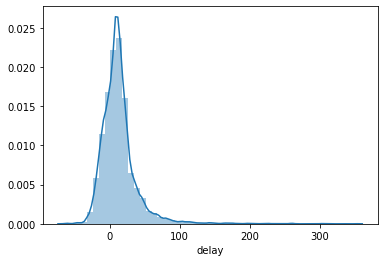

In [172]:
sns.distplot((df_vie["delay"]), bins = 50 )

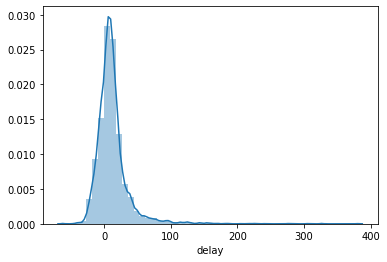

In [201]:
sns.distplot((df_bud["delay"]), bins = 50)

In [205]:
len(df_bud[df_bud["delay"] > 30]) / len(df_bud) * 100

12.110682110682111

In [204]:
len(df_vie[df_vie["delay"] > 30]) / len(df_vie) * 100

14.641982864137088

In [198]:
df_vie.groupby("status").mean()["delay"]

status
BLI          4.182626
airborne    22.165623
Name: delay, dtype: float64

In [206]:
df_bud.groupby("megjegyzes_eng").mean()["delay"]

megjegyzes_eng
Cancelled    92.000000
Departed     18.517926
Landed        5.210662
Name: delay, dtype: float64